##Importing Libraries

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

##Training Set Prepocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits&veggies_dataset.zip (Unzipped Files)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3113 files belonging to 36 classes.


##Validation Set Prepocessing

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits&veggies_dataset.zip (Unzipped Files)/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Creating CNN layers

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


cnn.add(tf.keras.layers.Dropout(0.25))


cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))


cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Model Training

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=45)

Epoch 1/45
98/98 [==============================] - 597s 6s/step - loss: 8.1359 - accuracy: 0.0324 - val_loss: 3.5831 - val_accuracy: 0.0285
Epoch 2/45
98/98 [==============================] - 159s 2s/step - loss: 3.5812 - accuracy: 0.0279 - val_loss: 3.5793 - val_accuracy: 0.0342
Epoch 3/45
98/98 [==============================] - 164s 2s/step - loss: 3.5762 - accuracy: 0.0324 - val_loss: 3.5664 - val_accuracy: 0.0399
Epoch 4/45
98/98 [==============================] - 162s 2s/step - loss: 3.5683 - accuracy: 0.0379 - val_loss: 3.5360 - val_accuracy: 0.0399
Epoch 5/45
98/98 [==============================] - 153s 1s/step - loss: 3.5484 - accuracy: 0.0482 - val_loss: 3.5015 - val_accuracy: 0.0798
Epoch 6/45
98/98 [==============================] - 158s 2s/step - loss: 3.4926 - accuracy: 0.0620 - val_loss: 3.4876 - val_accuracy: 0.0655
Epoch 7/45
98/98 [==============================] - 155s 2s/step - loss: 3.4449 - accuracy: 0.0726 - val_loss: 3.4156 - val_accuracy: 0.1197
Epoch 8/45
98

In [ ]:
cnn.save('tranining4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
model=tf.keras.models.load_model('/content/training.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [ ]:
model

In [4]:
import json
with open('/content/training_history.json','r') as f:
  data=json.load(f)
print(data)

{'loss': [5.961570739746094, 3.5785670280456543, 3.56821608543396, 3.5590944290161133, 3.528860569000244, 3.4915196895599365, 3.4584548473358154, 3.405186176300049, 3.281122922897339, 3.249889612197876, 3.1078760623931885, 2.9978837966918945, 2.8475358486175537, 2.6815731525421143, 2.560037851333618, 2.364670753479004, 2.1662309169769287, 2.099853992462158, 1.9144539833068848, 1.7117372751235962, 1.6555382013320923, 1.5020753145217896, 1.4021849632263184, 1.2765332460403442, 1.2348328828811646, 1.1264185905456543, 1.0092499256134033, 0.9582375288009644, 0.8550124168395996, 0.7848120927810669, 0.7900276184082031, 0.7241665124893188, 0.6645157337188721, 0.6388474702835083, 0.5860276222229004, 0.49295616149902344, 0.4362824261188507, 0.40985143184661865, 0.3589787781238556, 0.38432231545448303, 0.3715917468070984, 0.2859989404678345, 0.3245895802974701, 0.2722059488296509, 0.24127793312072754], 'accuracy': [0.02666238322854042, 0.02762608416378498, 0.044008996337652206, 0.0411178916692733

In [19]:

epochs=[i for i in range(1,46)]

In [18]:
len(data['accuracy'])

45

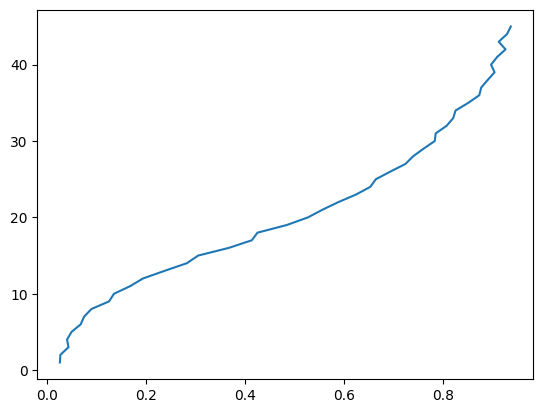

In [20]:
plt.plot(data['accuracy'],epochs)

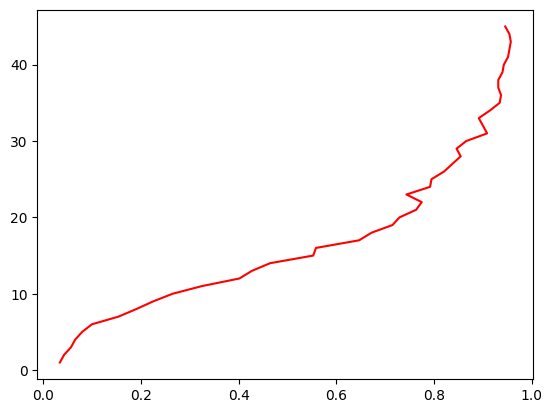

In [22]:
plt.plot(data['val_accuracy'],epochs,color='red')